In [1]:
#loading packages
import pandas as pd
import numpy as np #for mathematical calculations
import seaborn as sns
import matplotlib.pyplot as plt #for plotting graphs
from pathlib import Path #to create path to directories and files
%matplotlib inline
import warnings #to ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
#pointing path to directories and files
data = Path.cwd() /'data/electricity.csv'

#reading data
data = pd.read_csv(data)

In [3]:
#exploring the size of the data
data.shape

(8, 11)

In [4]:
data.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]'],
      dtype='object')

In [5]:
data.dtypes #prints data type for each variable

Country Name      object
Country Code      object
Series Name       object
Series Code       object
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]     object
dtype: object

In [6]:
data.head()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Sub-Saharan Africa,SSF,Access to electricity (% of population),EG.ELC.ACCS.ZS,37.349534,38.352562,38.252896,39.399695,44.808715,44.586100,..
1,Sub-Saharan Africa,SSF,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,17.635623,18.577392,17.609717,17.928872,24.775920,22.613252,..
2,Sub-Saharan Africa,SSF,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,72.012166,72.559545,72.780081,74.323935,76.924291,78.965233,..
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.tail()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Data from database: Sustainable Development Go...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Last Updated: 10/29/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#type of data we are handlling
data.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]     object
dtype: object

**Insight from above data**

- Looking at the shape of our data we see we have 8 rows and 11 columns.

- But looking closely at our data ('data.head' & 'data.tail'), we see only the first 3 rows have meaningful information, the rest of the rows have 'NaN' values. Also data['2018 [YR2018'] column has 'NaN' values.

- We will need to clean our data before gaining insights.

In [9]:
# dropping rows with NaN values
data = data.dropna()

In [10]:
'''
dropping columns:
Country Name, Country Code & Series Code since we won't need them in our analysis
2018 [YR2018] since it has no values
'''
data = data.drop(['Country Name', 'Country Code', 'Series Code', '2018 [YR2018]'], axis=1)

In [11]:
data.head()

,Series Name,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,Access to electricity (% of population),37.349534,38.352562,38.252896,39.399695,44.808715,44.586100
1,"Access to electricity, rural (% of rural popul...",17.635623,18.577392,17.609717,17.928872,24.775920,22.613252
2,"Access to electricity, urban (% of urban popul...",72.012166,72.559545,72.780081,74.323935,76.924291,78.965233


In [12]:
data['Series Name'].value_counts()

Access to electricity (% of population)                 1
Access to electricity, rural (% of rural population)    1
Access to electricity, urban (% of urban population)    1
Name: Series Name, dtype: int64

    I want to shorten the contents of 'Series Name' so that I will have:

- `Total(%)` in place of `Access to electricity (% of population)`

- `Urban(%)` in place of `Access to electricity, urban (% of urban population)`

- `Rural(%)` in place of `Access to electricity, rural (% of rural population)`

    Also we can rename the variable to 'Electricity_Coverage' to make it easily understood.

In [13]:
#renaming column
data.rename(columns={'Series Name': 'Electricity_Coverage'}, inplace=True)

#Change categories of Access to electricity:
print ('Original Categories:')
print (data['Electricity_Coverage'].value_counts())

print ('\nModified Categories:')
data['Electricity_Coverage'] = data['Electricity_Coverage'].replace({'Access to electricity (% of population)':'Total(%)',
                                                             'Access to electricity, urban (% of urban population)':'Urban(%)',
                                                             'Access to electricity, rural (% of rural population)':'Rural(%)'})
print (data['Electricity_Coverage'].value_counts())

Original Categories:
Access to electricity (% of population)                 1
Access to electricity, rural (% of rural population)    1
Access to electricity, urban (% of urban population)    1
Name: Electricity_Coverage, dtype: int64

Modified Categories:
Total(%)    1
Urban(%)    1
Rural(%)    1
Name: Electricity_Coverage, dtype: int64


In [14]:
data.head()

,Electricity_Coverage,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,Total(%),37.349534,38.352562,38.252896,39.399695,44.808715,44.586100
1,Rural(%),17.635623,18.577392,17.609717,17.928872,24.775920,22.613252
2,Urban(%),72.012166,72.559545,72.780081,74.323935,76.924291,78.965233


   Finaly to be able to analyse our data we need to make `Electricity_Coverage` to be columns and the year values to be our rows.
   
   This will assist in seeing the trend for `Total(%)`, `Rural(%)` and `Urban(%)`. Also how each relates to the `Total(%)`.
   

In [15]:
#using set_index() method on 'Electricity_Coverage' column

data_1 = data.set_index('Electricity_Coverage')
print(data_1)

                      2012 [YR2012]  2013 [YR2013]  2014 [YR2014]  \
Electricity_Coverage                                                
Total(%)                  37.349534      38.352562      38.252896   
Rural(%)                  17.635623      18.577392      17.609717   
Urban(%)                  72.012166      72.559545      72.780081   

                      2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  
Electricity_Coverage                                               
Total(%)                  39.399695      44.808715      44.586100  
Rural(%)                  17.928872      24.775920      22.613252  
Urban(%)                  74.323935      76.924291      78.965233  


In [16]:
#set index 'None' via its name property
data_1.index.names = [None]
print(data_1)

          2012 [YR2012]  2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  \
Total(%)      37.349534      38.352562      38.252896      39.399695   
Rural(%)      17.635623      18.577392      17.609717      17.928872   
Urban(%)      72.012166      72.559545      72.780081      74.323935   

          2016 [YR2016]  2017 [YR2017]  
Total(%)      44.808715      44.586100  
Rural(%)      24.775920      22.613252  
Urban(%)      76.924291      78.965233  


In [17]:
data_transposed = data_1.transpose()
print(data_transposed)

                Total(%)   Rural(%)   Urban(%)
2012 [YR2012]  37.349534  17.635623  72.012166
2013 [YR2013]  38.352562  18.577392  72.559545
2014 [YR2014]  38.252896  17.609717  72.780081
2015 [YR2015]  39.399695  17.928872  74.323935
2016 [YR2016]  44.808715  24.775920  76.924291
2017 [YR2017]  44.586100  22.613252  78.965233


In [18]:
data_transposed.dtypes

Total(%)    float64
Rural(%)    float64
Urban(%)    float64
dtype: object

In [19]:
#set index 'Year' via its name property
data_transposed.index.names = ['Year']
print(data_transposed)

                Total(%)   Rural(%)   Urban(%)
Year                                          
2012 [YR2012]  37.349534  17.635623  72.012166
2013 [YR2013]  38.352562  18.577392  72.559545
2014 [YR2014]  38.252896  17.609717  72.780081
2015 [YR2015]  39.399695  17.928872  74.323935
2016 [YR2016]  44.808715  24.775920  76.924291
2017 [YR2017]  44.586100  22.613252  78.965233


In [20]:
data_transposed.columns

Index(['Total(%)', 'Rural(%)', 'Urban(%)'], dtype='object')

In [21]:
data_transposed.head()

,Total(%),Rural(%),Urban(%)
Year,,,
2012 [YR2012],37.349534,17.635623,72.012166
2013 [YR2013],38.352562,18.577392,72.559545
2014 [YR2014],38.252896,17.609717,72.780081
2015 [YR2015],39.399695,17.928872,74.323935
2016 [YR2016],44.808715,24.775920,76.924291


In [22]:
#https://appdividend.com/2019/01/26/pandas-set-index-example-python-set_index-tutorial/
data_transposed.reset_index(level=0, inplace=True) #converting index into column
data_transposed

,Year,Total(%),Rural(%),Urban(%)
0,2012 [YR2012],37.349534,17.635623,72.012166
1,2013 [YR2013],38.352562,18.577392,72.559545
2,2014 [YR2014],38.252896,17.609717,72.780081
3,2015 [YR2015],39.399695,17.928872,74.323935
4,2016 [YR2016],44.808715,24.775920,76.924291
5,2017 [YR2017],44.586100,22.613252,78.965233


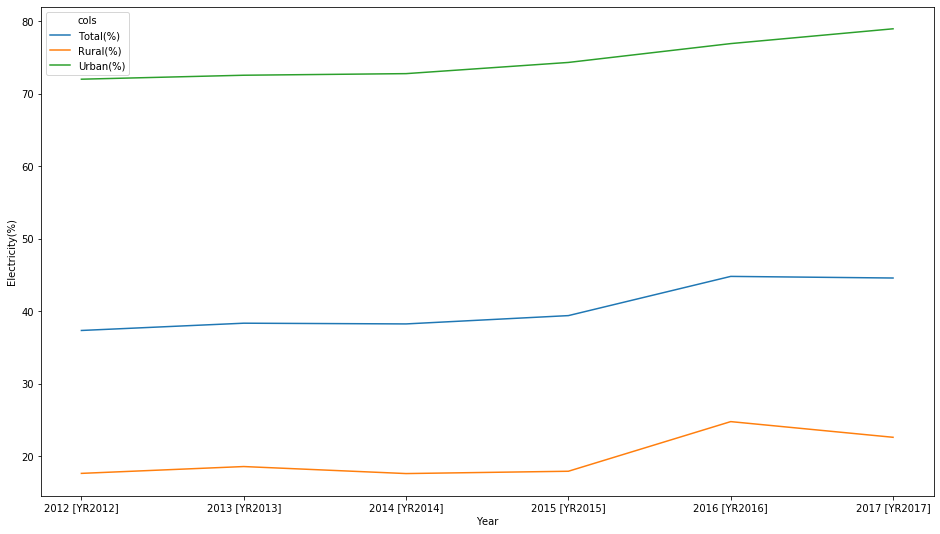

In [23]:
#line plot

data_transposed = data_transposed.melt('Year', var_name='cols', value_name='Electricity(%)')
plt.figure(figsize=(16,9))
sns.lineplot(x='Year', y='Electricity(%)', hue='cols', data=data_transposed)
plt.show()

**Insights from above plot**

- From above we see all the variables have an upward trend, though from 2012 upto around 2015 the electricity coverage seems to be relatively flat. It will be interesting to find out why years between 2012 and 2015 sluggish in electricity coverage.
- Comparing urban and rural electricity coverage, urban has a consistent upward trend while for rural it had a slight increase between 2012 and 2013, it then had a downward trend between 2013 and 2015 before shooting up again. This is also an interesting area of research, trying to find out why electricity coverage for rural behaves so and factors behind it.
- Also it will be interesting to know electricity coverage for the rest of the world and learn what they are doing different.